# Importando Bibliotecas

In [215]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt

## Importando os dados

In [216]:
df = pd.read_csv('geladeiras_final.csv', sep=';')

## Selecionando somente geladeira/refrigerador

In [217]:
lista = []
for geladeira in df['Descrição'].unique():
  if geladeira.split()[0] == 'Geladeira/Refrigerador' or geladeira.split()[0] == 'Geladeira' or geladeira.split()[0] == 'Refrigerador':
    lista.append(geladeira)


In [218]:
selecao = df['Descrição'].isin(lista)
df = df[selecao]

In [219]:
df

,Descrição,Nota,Nº de avaliadores,Preço
0,Refrigerador Electrolux Duplex DC35A 260L - Br...,4.5,3147,"R$ 1.999,00"
1,Refrigerador Consul CRD37EB com Prateleiras Re...,5.0,4416,"R$ 1.999,00"
2,Refrigerador Consul CRM56HB Frost Free com Esp...,5.0,722,"R$ 3.299,00"
3,Refrigerador Consul CRM50HK Frost Free com Esp...,5.0,361,"R$ 3.148,00"
4,Refrigerador Brastemp Inverse BRE57AK Frost Fr...,5.0,1391,"R$ 4.349,00"
...,...,...,...,...
932,Geladeira Comercial 4p Inox 430 700 L Frilux R...,0.0,0,"R$ 6.250,62"
933,Refrigerador Expositor Vertical Para Bebidas 8...,0.0,0,"R$ 2.847,39"
936,Refrigerador Conservador Conservex Rcv 570 Litros,0.0,0,"R$ 5.103,00"
938,Geladeira 6 portas 1400 Litros RF067 Mini Câma...,0.0,0,"R$ 10.572,30"


# Selecionando os primeiros 500 resultados

In [220]:
df = df.loc[0:500]
df.shape[0]

500

# Organizando pelo preço

In [221]:
df = df.sort_values(by='Preço', ascending=False)  

## Retirando o cifrão

In [222]:
def tirar_cifrao(nome):
    nome = nome.replace('R$', '')
    return nome


In [223]:
df['Preço'] = df['Preço'].apply(tirar_cifrao)

In [224]:
lista3 = []
for i in df['Preço']:
  if i == 'Indisponível':
    lista3.append(0)
  else:
    lista3.append(i)

In [225]:
selecao = df['Preço'].isin(lista3)
df = df[selecao]

## Ajustando a coluna preço

In [226]:
df

,Descrição,Nota,Nº de avaliadores,Preço
95,Geladeira Refrigerador Samsung 501 Litros 2 Po...,0.0,0,"8.999,00"
462,Refrigerador Inverse Frost Free BRY59BE 3 Port...,0.0,0,"8.479,00"
393,Geladeira Electrolux DF82X Infinity 553 Litros...,0.0,0,"7.581,90"
226,Geladeira Evolution RT38 Inverter Duplex 385L ...,4.0,1,"7.519,00"
224,Geladeira / Refrigerador Frost Free Brastemp S...,0.0,0,"7.381,93"
...,...,...,...,...
101,"Refrigerador Cycle Defrost Electrolux RE31, 24...",5.0,2,"1.799,00"
142,Geladeira Refrigerador Consul 1 Porta Degelo S...,4.0,1,"1.750,00"
191,Geladeira Esmaltec ROC31 Branco 1 Porta 245 Li...,0.0,0,"1.729,00"
21,Refrigerador Electrolux Degelo Prático 240L Cy...,5.0,8,"1.629,00"


In [227]:
df['Preço'] = df['Preço'].str.replace('.','')
df['Preço'] = df['Preço'].str.replace(',','.')
df['Preço'] = df['Preço'].astype(float, errors = 'raise')

In [228]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 480 entries, 95 to 6
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Descrição          480 non-null    object 
 1   Nota               480 non-null    float64
 2   Nº de avaliadores  480 non-null    int64  
 3   Preço              480 non-null    float64
dtypes: float64(2), int64(1), object(1)
memory usage: 18.8+ KB


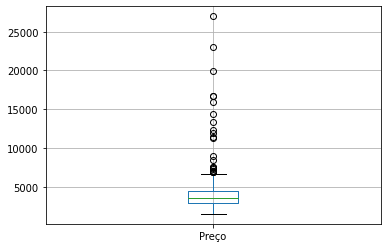

In [229]:
df2 = df.boxplot('Preço')

# Tratamento estatístico

In [230]:
df['Preço'].describe()

count      480.000000
mean      4067.029958
std       2399.718034
min       1499.000000
25%       2949.000000
50%       3599.945000
75%       4469.000000
max      26999.000000
Name: Preço, dtype: float64

In [231]:
preco = df['Preço']

## Primeiro e terceiro quartis

In [232]:
q1 = preco.quantile(.25)
q3 = preco.quantile(.75)

## Intervalo interquatile

In [233]:
iiq = q3 - q1

## Limites

In [234]:
lim_inf = q1 - 1.5 * iiq
lim_sup = q3 + 1.5 * iiq

## Selecionando dados no intervalo

In [235]:
selecao = (preco >= lim_inf) & (preco <= lim_sup)

df_new = df[selecao]

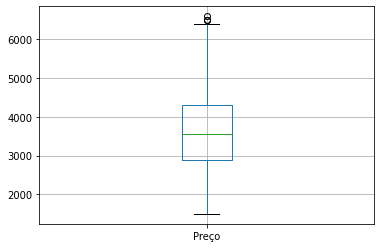

In [237]:
df_new.boxplot(['Preço'])

## Histograma

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f15bed9a2d0>]],
      dtype=object)

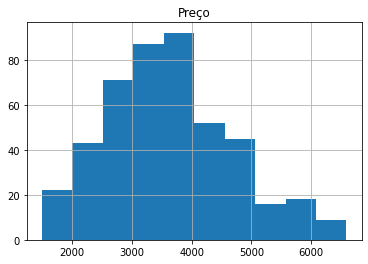

In [239]:
df_new.hist(['Preço'])